`CMPE-255. Fall 2023`

# Beating the Market
After taking a Data Mining class, Suzie Happybetting decided that she could use Association Rules to beat the stock market. Armed with the knowledge of data cleaning, data sampling, and association analysis, she devised an algorithm to pick the right companies to invest in. Her strategy will be to identify groups of companies that increase value over periods of 6 months, calculate the confidence that this groups grow together, then bet in the companies in a high confidence rule before their stock goes up. For instance, if she finds out that `{ AMD, APPL, NVDA }` have high support, and `{ AMD, APPL } > { NVDA }` has high confidence, she can invest in NVDA as soon as the stock for AMD, APPL go up, because she'll expect the stock from NVDA will quickly follow.

In [60]:
# Libraries - ONLY THIS LIBRARIES ARE ALLOWED FOR THE HOMEWORK
import random
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import progressbar
# Do not add any other library

In [61]:
# Stock tickers. Small is best for debuging the code. Medium or Large should be used for final solution.
TICKERS_SMALL = ['AMD', 'AAPL', 'MA', 'MRK', 'NVDA', 'PPIH', 'GLO', 'AGM']
TICKERS_MEDIUM = TICKERS_SMALL + ['HGBL', 'ETO', 'INFY', 'SNBR', 'CENTA', 'CWT', 'SKX',
 'FSS', 'TPR', 'ONB', 'SBH', 'MDT', 'SENEB', 'HSBC', 'STN', 'JOB', 'TYG', 'TENX', 'TRN', 'CTHR']
TICKERS_LARGE  = TICKERS_MEDIUM + ['NSIT', 'LCTX', 'CIB', 'TILE', 'SIGI', 'WINA', 'OPY', 'ARE', 'LGND', 'ITI',
 'ENSV', 'PGC', 'SYK', 'MUA', 'WCC', 'AZN', 'GCV', 'NR',
 'DD', 'HWBK', 'HIMX', 'GPC', 'ORCL', 'GREE', 'TY', 'GBR', 'TGI', 'RCG', 'AMWD', 'ELP', 'MGRC', 'EGLE', 'CYD', 'IART',
 'DINO', 'ENSG', 'SPOK', 'YORW', 'AWF', 'CMTL', 'XOM', 'OTTR', 'BZH', 'AXDX', 'ANIP', 'EZPW', 'AEM', 'NZF', 'BX', 'OI',
 'TAIT', 'TWIN', 'CYTK', 'BOTJ', 'AMZN', 'AEY', 'SATS', 'UAVS', 'TS', 'ORMP', 'KO', 'CVR', 'HOFT', 'NVDA', 'BANC', 'MMC',
 'ERII', 'WWW', 'IMKTA', 'CSX', 'DNP', 'CVGW', 'ESOA', 'BRN', 'HIBB', 'SRT', 'GEG', 'CW', 'UTF', 'GRMN', 'QGEN', 'EYPT', 'HEP', 'APWC', 'EA', 'DYAI', 'ELME', 'SPCB',
 'LII', 'CWST', 'CPLP', 'GDO', 'AVY', 'PZC', 'AXGN', 'SOHU', 'CNOB', 'BELFA', 'ETB', 'BSBR', 'IAF', 'CASH', 'CTO', 'ITW', 'DYNT', 'AE', 'EGP', 'PAYX', 'JBL', 'CAMP',
 'EBR', 'KOPN', 'NX', 'SEE', 'LOW', 'ATRO', 'NKX', 'ADUS', 'CNXN', 'BMI', 'CRK', 'BSET', 'CRS', 'CPRX', 'OMCL', 'KRNY',
 'AVT', 'MUFG', 'BBWI', 'REI', 'TARO', 'MFD', 'VLO', 'CFR', 'PBR', 'SFE', 'MTRX', 'AREN', 'CVU', 'SR', 'KVHI', 'LFMD',
 'DJCO', 'CXE', 'EME', 'SITC', 'GLDD', 'MT', 'KELYB', 'KSM', 'NHC', 'PHM', 'MCI', 'HLX', 'ALX', 'CLM', 'ECL', 'LMAT',
 'NTAP', 'PMN', 'LWLG', 'MASI', 'PEB', 'BKNG', 'K', 'PGP', 'FGH', 'SEM', 'AAP', 'PRGS', 'CNTY', 'RNR', 'MHF', 'TNC',
 'FSFG', 'MODG', 'CREX', 'ESGR', 'CIK', 'PAC', 'HSII', 'SWK', 'BRT', 'PTRS', 'MMT', 'IGT', 'RAND', 'HBAN', 'WSFS',
 'OPI', 'GLRE', 'FLIC', 'HUM', 'NEOG', 'BNS', 'DSWL', 'NEO', 'UMH', 'GCO', 'ASML', 'VERU', 'OTRK', 'HRI', 'ATO', 'CODA',
 'EPR', 'SLGN', 'ELLO', 'NRG', 'TXN', 'CIM', 'BKD', 'PEBO', 'C', 'MGYR', 'GNW', 'JNPR' ]

TICKERS_ALL = ['AMD', 'AAPL', 'MA', 'MRK', 'NVDA', 'PPIH', 'GLO', 'AGM', 'HGBL', 'ETO', 'INFY', 'SNBR', 'CENTA', 'CWT', 'DBD',
 'CSII', 'TRTN', 'SKX', 'FSS', 'TPR', 'ONB', 'SBH', 'MDT', 'SENEB', 'HSBC', 'STN', 'JOB', 'TYG', 'TENX', 'TRN', 'CTHR',
 'NSIT', 'LCTX', 'CIB', 'TILE', 'SIGI', 'WINA', 'OPY', 'ARE', 'LGND', 'ITI', 'ENSV', 'PGC', 'SYK', 'MUA', 'WCC', 'AZN', 'GCV', 'NR',
 'DD', 'HWBK', 'HIMX', 'GPC', 'ORCL', 'GREE', 'TY', 'GBR', 'TGI', 'RCG', 'AMWD', 'ELP', 'MGRC', 'EGLE', 'CYD', 'IART',
 'DINO', 'ENSG', 'SPOK', 'YORW', 'AWF', 'CMTL', 'XOM', 'OTTR', 'BZH', 'AXDX', 'ANIP', 'EZPW', 'AEM', 'NZF', 'BX', 'OI',
 'TAIT', 'TWIN', 'CYTK', 'BOTJ', 'AMZN', 'AEY', 'SATS', 'UAVS', 'TS', 'ORMP', 'KO', 'CVR', 'HOFT', 'NVDA', 'BANC', 'MMC',
 'ERII', 'WWW', 'IMKTA', 'CSX', 'DNP', 'CVGW', 'ESOA', 'BRN', 'HIBB', 'SRT', 'GEG', 'CW', 'UTF', 'GRMN', 'QGEN', 'EYPT', 'HEP', 'APWC', 'EA', 'DYAI', 'ELME', 'SPCB',
 'LII', 'CWST', 'CPLP', 'GDO', 'AVY', 'PZC', 'AXGN', 'SOHU', 'CNOB', 'BELFA', 'ETB', 'BSBR', 'IAF', 'CASH', 'CTO', 'ITW', 'DYNT', 'AE', 'EGP', 'PAYX', 'JBL', 'CAMP',
 'EBR', 'KOPN', 'NX', 'SEE', 'LOW', 'ATRO', 'NKX', 'ADUS', 'CNXN', 'BMI', 'CRK', 'BSET', 'CRS', 'CPRX', 'OMCL', 'KRNY',
 'AVT', 'MUFG', 'BBWI', 'REI', 'TARO', 'MFD', 'VLO', 'CFR', 'PBR', 'SFE', 'MTRX', 'AREN', 'CVU', 'SR', 'KVHI', 'LFMD',
 'DJCO', 'CXE', 'EME', 'SITC', 'GLDD', 'MT', 'KELYB', 'KSM', 'NHC', 'PHM', 'MCI', 'HLX', 'ALX', 'CLM', 'ECL', 'LMAT',
 'NTAP', 'PMN', 'LWLG', 'MASI', 'PEB', 'BKNG', 'K', 'PGP', 'FGH', 'SEM', 'AAP', 'PRGS', 'CNTY', 'RNR', 'MHF', 'TNC',
 'FSFG', 'MODG', 'CREX', 'ESGR', 'CIK', 'PAC', 'HSII', 'SWK', 'BRT', 'PTRS', 'MMT', 'IGT', 'RAND', 'HBAN', 'WSFS',
 'OPI', 'GLRE', 'FLIC', 'HUM', 'NEOG', 'BNS', 'DSWL', 'NEO', 'UMH', 'GCO', 'ASML', 'VERU', 'OTRK', 'HRI', 'ATO', 'CODA',
 'EPR', 'SLGN', 'ELLO', 'NRG', 'TXN', 'CIM', 'BKD', 'PEBO', 'C', 'MGYR', 'GNW', 'JNPR',
 'NUS', 'BMA', 'IVAC', 'GOOGL', 'THG', 'DBI', 'INTG', 'LH', 'ILMN', 'UMC', 'FTEK', 'CMU', 'HWC', 'CCRD', 'NXDT', 'DG',
 'NEM', 'HFWA', 'PW', 'VCV', 'STBA', 'CUEN', 'ERJ', 'LCI', 'NSYS', 'UVV', 'WF', 'MMLP', 'PRIM', 'HAS', 'SP', 'DHIL',
 'GSAT', 'UPBD', 'NTRS', 'VXRT', 'UONE', 'TOL', 'SAP', 'AAME', 'AXON', 'WST',
 'MCK', 'EXC', 'TAC', 'BAX', 'SRCE', 'FMAO', 'ITCB', 'HQL',
 'EFOI', 'BFIN', 'CNMD', 'PBI', 'CNX', 'MSEX', 'CFBK', 'DNN', 'AMS', 'TOVX', 'CME', 'TEX', 'SOFO', 'WSO', 'LEO', 'RBBN',
 'STAA', 'ADBE', 'BR', 'NNVC', 'NBH', 'ERH', 'BHC', 'IMH', 'RWT', 'EPC', 'HYT', 'UFPI', 'VSAT', 'NXPL', 'MAG', 'FCBC',
 'GLAD', 'CVM', 'WAL', 'LNG', 'UTHR', 'CLX', 'UTL', 'ESS', 'JPS', 'HYB', 'MDRX', 'VGR', 'PHI', 'BLKB', 'KR', 'CMCO',
 'RDNT', 'HIFS', 'CPT', 'SHBI', 'USAU', 'BAP', 'T', 'SMBC', 'TBI', 'MOBQ', 'DB', 'MRTN', 'FORM', 'UTMD', 'PUK', 'ARI',
 'ARAY', 'FL', 'KLIC', 'IOSP', 'PSO', 'TDS', 'CPK', 'SHYF', 'CLFD', 'SAH', 'SENEA', 'PAM', 'NGG', 'ASGN', 'ENX', 'NMZ',
 'DOOR', 'VOXX', 'MCHX', 'FFC', 'NICK']

# Stock data will be downloaded for within the following range of dates
DATA_RANGE_START = '2010-01-01'
DATA_RANGE_END   = '2022-12-31'

# Number of days (entries) to calculate stock trends
DATA_INTERVAL = 120
# Minimum change in trend to consider = 10%
TREND_THRESHOLD = 0.1
# Minimum itemset support to consider = 0.5%
SUPPORT_THRESHOLD = 0.005

In [62]:
def add_noise_to_dataset(dataset):
  '''Add noise to the data in the dataset.
  It modifies data in the 'Close' column.
  It introduces to types of incorrect values:
  1 - Makes the value negative
  2 - Makes the value inconsistent with the provided 'High' and 'Low' range

  Example: Given the following entry:

  Date        Open  High  Low   Close Adj Close Volume
  2010-01-04	9.79	9.90	9.68	9.70	9.70      18748700

  Type 1 will make the 'Close' value negative:
  Date        Open  High  Low   Close Adj Close Volume
  2010-01-04	9.79	9.90	9.68	-9.70	9.70      18748700

  Type 2 will make the 'Close' value inconsistent with 'High' and 'Low',
  for instance,
  Date        Open  High  Low   Close Adj Close Volume
  2010-01-04	9.79	9.90	9.68	9.94	9.70      18748700

  In the example above, the 'Close' value, '9.94' is LARGER THAN the 'High'
  value, which is not correct.
  '''
  # Percentage of errors to insert the data for each ticker
  PERCENT_OF_ERRORS = 0.5
  # Iterate through all tickers
  for ticker in dataset.keys():
    datasize = dataset[ticker].shape[0]
    no_of_errors = int(datasize*PERCENT_OF_ERRORS/100)
    # Iterate through the number of errors to insert
    for idx in range(no_of_errors):
      # Randomly choose the type of error to insert, 1 or 2
      type_of_error = random.randint(1, 2)
      place_of_error = random.randint(0, datasize-1)

      original_value = dataset[ticker].iloc[place_of_error, 3]
      # Insert error of type 1 - Make entry zero
      if type_of_error == 1:
        dataset[ticker].iloc[place_of_error, 3] = -1.0*original_value
      # Insert error of type 2 - Make entry inconsistent
      elif type_of_error == 2:
        if random.randint(0, 1):
          dataset[ticker].iloc[place_of_error, 3] = original_value + 2*(dataset[ticker].iloc[place_of_error, 1]-dataset[ticker].iloc[place_of_error, 2])
        else:
          dataset[ticker].iloc[place_of_error, 3] = dataset[ticker].iloc[place_of_error, 2]/2

      #print("DBG: Modified ticker", ticker, "at location", place_of_error, ". Original value:", original_value, ". New value:", dataset[ticker].iloc[place_of_error, 4])

  print("Added", no_of_errors, "errors to each ticker in the database")

  return dataset

In [63]:
def get_clean_dataset(tickers, start_date, end_date):
  '''Method to retrieve all the data required for this homework.
  input: list of stock tickers (e.g., ['AAPL', 'META', 'AMD'])
  output: dictionary of pandas dataframes with historical values for each ticker.
          e.g., data['AMD'] = pandas dataframe

  The output dataframe looks as follows:

  Date        Open  High  Low   Close Adj Close Volume
  2010-01-04	9.79	9.90	9.68	9.70	9.70      18748700
  2010-01-05  9.81  9.99  9.23  9.54  9.68      20010100
  ...

  NOTE: The total number of entries is fixed to the number of entries of the
        first ticket read
  '''
  dataset = {}
  no_entries = -1
  for ticker in tickers:
    try:
      ds = yf.download(ticker, start_date, end_date)
      print ("Downloaded data for ticker:", ticker, "with", ds.shape, "entries")
      if no_entries == -1 or ds.shape[0] == no_entries:
        dataset.update({ticker : ds});
        no_entries = ds.shape[0]
      else:
        print("WARN: DISCARDING dataset for ticker", ticker, " with unexpected number of entries!")
    except:
      print("WARN: Unable to download dataset for ticker:", ticker)

  print("Downloaded historical data for", len(dataset), "tickers")
  return dataset


In [64]:
def get_dataset(tickers):
  '''Retrieve a dataset with the provided tickers, and
  insert errors.
  Return a dataset with errors inserted'''
  return add_noise_to_dataset(get_clean_dataset(tickers, DATA_RANGE_START, DATA_RANGE_END))

In [65]:
# Example - Get small dataset
ds = get_dataset(TICKERS_SMALL)

[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AMD with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AAPL with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MRK with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: NVDA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: PPIH with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: GLO with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AGM with (3272, 6) entries
Downlo

In [66]:
# Example - Display values for first ticker in the dataset
ds['AMD']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,9.790000,9.900000,9.680000,9.700000,9.700000,18748700
2010-01-05,9.710000,9.900000,9.680000,9.710000,9.710000,22145700
2010-01-06,9.680000,9.760000,9.550000,9.570000,9.570000,18643400
2010-01-07,9.510000,9.550000,9.180000,9.470000,9.470000,26806800
2010-01-08,9.370000,9.470000,9.290000,9.430000,9.430000,13752800
...,...,...,...,...,...,...
2022-12-23,63.110001,64.660004,62.720001,64.519997,64.519997,45923000
2022-12-27,63.869999,64.279999,62.970001,63.270000,63.270000,36086000
2022-12-28,62.540001,63.540001,61.959999,62.570000,62.570000,39526500


# 1. Clean Dataset

Create a function, `clean_data(dataset)` that will take the dataset created by function `get_dataset(tickers)` and return a new dataset where all errors are fixed.
The function must be clearly documented. In particular it must include:
- A list of error types it can detect.
- An explanation of what technique is used to fix each error type, and why.


In [67]:
def clean_data(dataset):

    cleaned_dataset = {}
    for ticker, df in dataset.items():
        # Fix missing values
        df.fillna(df.median(), inplace=True)

        # Remove duplicates
        df.drop_duplicates(inplace=True)

        # Fix outliers
        for col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

        # Error type 1: Making the 'Close' value negative
        df['Close'] = df['Close'].abs()

        # Error type 2: Making the 'Close' value inconsistent with 'High' and 'Low'
        df['Close'] = df.apply(lambda row: min(row['High'], max(row['Low'], row['Close'])), axis=1)

        # Add cleaned data to cleaned_dataset
        cleaned_dataset[ticker] = df

    return cleaned_dataset


This function processes a dataset to correct any errors, enhancing data quality for analysis.

**Error Fixes & Techniques:**
1. **Negative 'Close' values:**
   - Convert to absolute values.
   - Reason: Negative 'Close' values are illogical, likely data entry errors.

2. **Inconsistent 'Close' values:**
   - Ensure 'Close' is between 'High' and 'Low'.
   - Reason: 'Close' should logically lie within 'High' and 'Low'.

3. **Missing values:**
   - Replace with column's median.
   - Reason: Median is less sensitive to outliers compared to mean.

4. **Duplicates:**
   - Remove duplicate rows.
   - Reason: Duplicates skew results without adding value.

5. **Outliers:**
   - Replace with column's median.
   - Reason: Outliers can significantly skew the mean.

**Parameters:**
- `dataset (dict)`: Keys are tickers, values are pandas DataFrames.

**Returns:**
- Cleaned dataset (dict).

In [68]:
dataset = clean_data(ds)

# 2. Transactions Database

Create a function, `get_transactions(dataset, data_interval, trend_threshold)` that will take the clean dataset from `clean_data(dataset)` and generate a Transactions database that can be used for the analysis described in the deliverables below.


In [69]:
import pandas as pd

def get_transactions(dataset, data_interval, trend_threshold):

    # Initialize an empty DataFrame to store the transactions
    transactions = pd.DataFrame()

    # Iterate through each stock in the dataset
    for stock, stock_data in dataset.items():
        # Calculate trends for the current stock as 1 if growth >= TREND_THRESHOLD, 0 otherwise
        stock_data['trend'] = (stock_data['Close'].shift(-1) - stock_data['Close']) / stock_data['Close'] >= trend_threshold
        stock_data['trend'] = stock_data['trend'].astype(int)

        # Resample data to the specified data_interval (e.g., '7D' for weekly)
        resampled_data = stock_data.resample(data_interval).sum()
        # Rename the 'trend' column to the stock symbol
        resampled_data.rename(columns={'trend': stock}, inplace=True)

        # Add the stock's trend data to the transactions DataFrame
        transactions[stock] = resampled_data[stock]

    transactions_data = transactions.applymap(lambda x: 1 if x >= 1 else 0)
    transactions_data['ID'] = range(1, len(transactions_data) + 1)
    return transactions_data



### Function: Generate Transactions Database for Stock Trend Analysis

**Parameters:**
- `dataset` (dict): A dictionary containing stock data, where keys are stock symbols and values are Pandas DataFrames with stock data.
- `data_interval` (str): A string specifying the time interval for transactions, e.g., 'D' for day, 'W' for week, 'M' for month.
- `trend_threshold` (float): A float specifying the threshold for identifying positive trends in stock price.

**Returns:**
- `transactions` (DataFrame): A Pandas DataFrame with stock symbols as columns, and rows representing time intervals. Each cell contains 1 if there is a positive trend in that interval, and 0 otherwise.

**Process:**
1. Initialize an empty DataFrame `transactions`.
2. For each stock in `dataset`:
   a. Calculate trends as 1 if growth >= `trend_threshold`, and 0 otherwise.
   b. Resample data to the specified `data_interval`.
   c. Rename the 'trend' column to the stock symbol.
   d. Add the stock's trend data to `transactions`.
3. Convert all cell values in `transactions` to 1 if >= 1, otherwise 0.
4. Add an 'ID' column with a range of IDs.
5. Return the `transactions` DataFrame.


In [70]:
# Sample data for demonstration
from datetime import datetime

DATA_INTERVAL = "120D"

TREND_THRESHOLD = 0.05

In [71]:

transactions = get_transactions(dataset, DATA_INTERVAL, TREND_THRESHOLD)
print("TICKERS:", list(dataset.keys()))
print("TRANSACTIONS Table with", transactions.shape, "= (data entries, tickers). Threshold:", TREND_THRESHOLD)


TICKERS: ['AMD', 'AAPL', 'MA', 'MRK', 'NVDA', 'PPIH', 'GLO', 'AGM']
TRANSACTIONS Table with (40, 9) = (data entries, tickers). Threshold: 0.05


In [72]:
transactions

,AMD,AAPL,MA,MRK,NVDA,PPIH,GLO,AGM,ID
Date,,,,,,,,,
2010-01-04,1,1,0,1,1,0,0,1,1
2010-05-04,1,1,0,0,1,1,0,1,2
2010-09-01,1,0,1,0,1,1,0,1,3
2010-12-30,1,0,0,0,1,1,0,1,4
2011-04-29,1,1,1,0,1,1,1,1,5
2011-08-27,1,1,1,0,1,1,0,1,6
2011-12-25,1,1,1,0,0,0,0,1,7
2012-04-23,1,1,0,0,1,0,0,1,8
2012-08-21,1,1,0,0,0,1,0,0,9


# 3. Selection of minimum support.

## 3.1 Support Functions
Create and clearly document functions that calculate and return the support and interest of an itemset, and the confidence and lift of a rule.

The functions should look like:
* `calculate_support(transactions, itemset)`
* `calculate_confidence(transactions, lefT_itemset, right_itemset)`
* `calculate_lift(transactions, left_itemset, right)`

In [73]:
import pandas as pd

def calculate_support(transactions, itemset):
    """
    Calculate the support of an itemset in the transactions.

    Parameters:
    transactions (DataFrame): DataFrame with transaction data.
    itemset (set or frozenset): Set of items for which support is calculated.

    Returns:
    support (float): Support value for the itemset.
    """
    total_transactions = len(transactions)
    if total_transactions == 0:
        return 0.0  # Avoid division by zero

    itemset_support = 0

    for _, row in transactions.iterrows():
        if all(item in row.index and row[item] == 1 for item in itemset):
            itemset_support += 1

    support = itemset_support / total_transactions
    return support

def calculate_confidence(transactions, left_itemset, right_itemset):
    """
    Calculate the confidence of a rule (left_itemset -> right_itemset) in the transactions.

    Parameters:
    transactions (DataFrame): DataFrame with transaction data.
    left_itemset (set or frozenset): Set of items on the left-hand side of the rule.
    right_itemset (set or frozenset): Set of items on the right-hand side of the rule.

    Returns:
    confidence (float): Confidence value for the rule.
    """
    left_support = calculate_support(transactions, left_itemset)
    if left_support == 0.0:
        return 0.0  # Avoid division by zero

    rule_support = calculate_support(transactions, left_itemset.union(right_itemset))
    confidence = rule_support / left_support
    return confidence

def calculate_lift(transactions, left_itemset, right_itemset):
    """
    Calculate the lift of a rule (left_itemset -> right_itemset) in the transactions.

    Parameters:
    transactions (DataFrame): DataFrame with transaction data.
    left_itemset (set or frozenset): Set of items on the left-hand side of the rule.
    right_itemset (set or frozenset): Set of items on the right-hand side of the rule.

    Returns:
    lift (float): Lift value for the rule.
    """
    left_support = calculate_support(transactions, left_itemset)
    right_support = calculate_support(transactions, right_itemset)

    if left_support == 0.0 or right_support == 0.0:
        return 0.0  # Avoid division by zero

    rule_support = calculate_support(transactions, left_itemset.union(right_itemset))
    lift = rule_support / (left_support * right_support)
    return lift


In [74]:

print("Support    for itemset {'AMD', 'AAPL', 'NVDA'}  =", calculate_support(transactions, {'AMD', 'AAPL', 'NVDA'}))
print("Confidence for rule {'AMD', 'AAPL'} => {'NVDA'} =", calculate_confidence(transactions, {'AMD', 'AAPL'}, {'NVDA'}))
print("Lift       for rule {'AMD', 'AAPL'} => {'NVDA'} =", calculate_lift(transactions, {'AMD', 'AAPL'}, {'NVDA'}))


Support    for itemset {'AMD', 'AAPL', 'NVDA'}  = 0.4
Confidence for rule {'AMD', 'AAPL'} => {'NVDA'} = 0.8421052631578948
Lift       for rule {'AMD', 'AAPL'} => {'NVDA'} = 1.0865874363327674


## 3.2 Histogram
Generate and display a histogram of 1-itemset support (or support count) ordered from lowest to highest support. Print out the items in the top 10% percentile.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_histogram(tickers, transactions):
    """
    Generate and display a histogram of 1-itemset support (or support count) for the given tickers.

    Parameters:
    tickers (list): List of stock tickers to include in the histogram.
    transactions (DataFrame): DataFrame with transaction data including tickers.

    Returns:
    None
    """
    # Filter the transactions DataFrame to include only the selected tickers
    selected_transactions = transactions[tickers]

    # Calculate support for each 1-itemset (ticker)
    itemset_support = selected_transactions.sum() / len(selected_transactions)

    # Sort itemsets by support in ascending order
    sorted_itemsets = itemset_support.sort_values()

    # Create a histogram of 1-itemset support
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_itemsets.index, sorted_itemsets.values)
    plt.xlabel('Stock Tickers')
    plt.ylabel('Support')
    plt.title('Histogram of 1-Itemset Support')
    plt.xticks(rotation=90)
    plt.grid(True)

    # Show the histogram
    plt.show()

def calculate_top_percentile(top_percent, tickers, transactions):
    """
    Calculate and return the top percentile of tickers based on their support.

    Parameters:
    top_percent (float): The top percentile to calculate (e.g., 0.10 for the top 10%).
    tickers (list): List of stock tickers to include in the calculation.
    transactions (DataFrame): DataFrame with transaction data including tickers.

    Returns:
    top_tickers (list): List of tickers in the top percentile.
    """
    # Filter the transactions DataFrame to include only the selected tickers
    selected_transactions = transactions[tickers]

    # Calculate support for each 1-itemset (ticker)
    itemset_support = selected_transactions.sum() / len(selected_transactions)

    # Sort itemsets by support in descending order
    sorted_itemsets = itemset_support.sort_values(ascending=False)

    # Calculate the number of tickers in the top percentile
    num_top_tickers = int(len(sorted_itemsets) * top_percent)

    # Get the top tickers in the specified percentile
    top_tickers = sorted_itemsets.index[:num_top_tickers].tolist()

    return top_tickers


In [76]:
# Sample data for demonstration
DATA_INTERVAL = "120D"
TREND_THRESHOLD = 0.1

[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AMD with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AAPL with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MRK with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: NVDA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: PPIH with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: GLO with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AGM with (3272, 6) entries
[*****

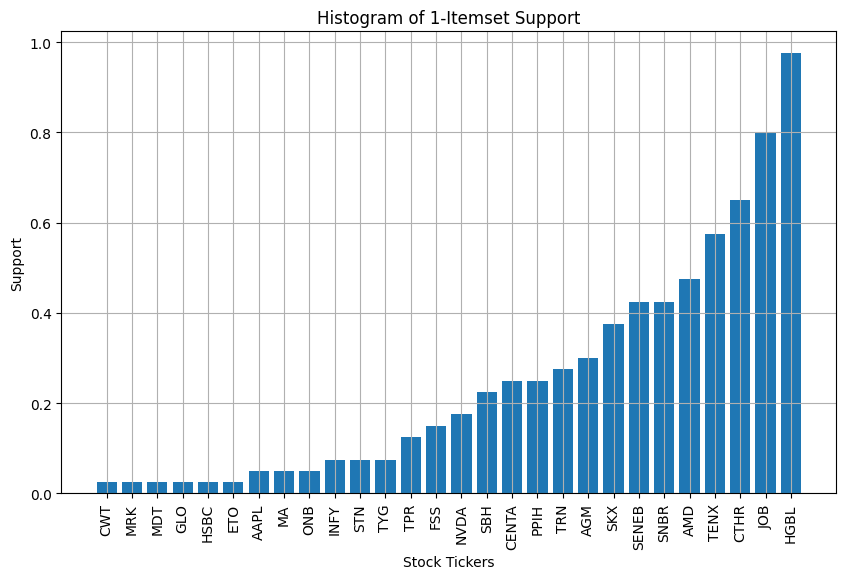

In [77]:
ds_medium = get_dataset(TICKERS_MEDIUM)
dataset_medium = clean_data(ds_medium)
transactions_medium = get_transactions(dataset_medium, DATA_INTERVAL, TREND_THRESHOLD)
generate_histogram(TICKERS_MEDIUM, transactions_medium)


In [78]:
calculate_top_percentile(10, TICKERS_MEDIUM, transactions_medium)

['HGBL',
 'JOB',
 'CTHR',
 'TENX',
 'AMD',
 'SNBR',
 'SENEB',
 'SKX',
 'AGM',
 'TRN',
 'CENTA',
 'PPIH',
 'SBH',
 'NVDA',
 'FSS',
 'TPR',
 'INFY',
 'STN',
 'TYG',
 'AAPL',
 'ONB',
 'MA',
 'CWT',
 'GLO',
 'MDT',
 'ETO',
 'HSBC',
 'MRK']

In [79]:
transactions_medium

,AMD,AAPL,MA,MRK,NVDA,PPIH,GLO,AGM,HGBL,ETO,...,MDT,SENEB,HSBC,STN,JOB,TYG,TENX,TRN,CTHR,ID
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
2010-05-04,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,1,2
2010-09-01,0,0,0,0,0,1,0,1,1,0,...,0,1,0,0,1,0,0,0,1,3
2010-12-30,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,4
2011-04-29,1,0,1,0,1,0,0,1,1,0,...,0,0,0,0,1,1,0,1,1,5
2011-08-27,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,1,6
2011-12-25,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,7
2012-04-23,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1,0,0,1,0,8
2012-08-21,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,9


# 4. Frequent Itemsets

## 4.1 Apriori unoptimized
Create and clearly document a function that calculates frequent itemsets using the "Apriori" algorithm without any optimization. The function, `apriori_unoptimized(minsup, transactions)` will take as inputs the transactions generated by function `get_transactions` and a minsup floating point value between 0 and 1, and generate a list of frequent items with basic statistics, as follows:

Found 27 1-frequent itemsets: { AMD }, { APPL }, { WST }, ... { FSC }

Found 345 2-frequent itemsets: { GLO, CWT }, { JOB, TYG }, ... { ELLO, NRG }

...

Found N M-frequent itemsets: ...


In [80]:
def apriori_unoptimized(minsup, transactions):
    """
    Generate frequent itemsets using the Apriori algorithm.

    Parameters:
    minsup: float
        Minimum support threshold for the itemsets to be considered frequent.
    transactions: pandas DataFrame
        Transaction data with items as columns and rows as transactions.
        A value of 1 indicates the presence of an item in a transaction,
        and 0 indicates its absence.

    Returns:
    list of sets
        List containing frequent itemsets.
    """
    # Initialize variables
    frequent_itemsets = []
    item_support = {}
    minsup_count = minsup * len(transactions)

    # Find 1-frequent itemsets
    for item in transactions.columns:
        support = transactions[item].sum()
        item_support[item] = support
        if support >= minsup_count:
            frequent_itemsets.append(frozenset({item}))  # Convert to frozenset

    current_size = 2

    while True:
        candidates = []

        # Generate candidate itemsets by merging frequent itemsets from the previous iteration
        for i in range(len(frequent_itemsets)):
            for j in range(i + 1, len(frequent_itemsets)):
                candidate = frequent_itemsets[i] | frequent_itemsets[j]
                if len(candidate) == current_size:
                    candidates.append(candidate)

        candidate_support = {itemset: 0 for itemset in candidates}

        # Count support for each candidate itemset
        for _, row in transactions.iterrows():
            for candidate in candidates:
                if all(row[item] == 1 for item in candidate):
                    candidate_support[candidate] += 1

        # Select candidate itemsets with support above the threshold as frequent itemsets
        current_frequent_itemsets = [itemset for itemset, support in candidate_support.items() if
                                     support >= minsup_count]

        if not current_frequent_itemsets:
            break

        frequent_itemsets.extend(current_frequent_itemsets)
        current_size += 1

    # Convert the itemsets back to sets for consistent output format.
    frequent_itemsets = [set(itemset) for itemset in frequent_itemsets]

    # Print the frequent itemsets and their counts.
    for size in range(1, len(transactions.columns) + 1):
        size_itemsets = [itemset for itemset in frequent_itemsets if len(itemset) == size]
        print(f"Found {len(size_itemsets)} {size}-frequent itemsets:")
        for itemset in size_itemsets:
            print(itemset)

    return frequent_itemsets


### Function: `apriori_unoptimized`

The `apriori_unoptimized` function calculates frequent itemsets using the Apriori algorithm.

**Steps:**
1. Initialize `frequent_itemsets`, `item_support`, and `minsup_count`.
2. Generate 1-frequent itemsets by checking support against `minsup_count`.
3. Generate larger itemsets: create candidates by merging previous itemsets, count support, and filter by `minsup_count`.
4. Convert itemsets to sets, print them, and return the list.

This straightforward implementation is not optimized for efficiency.


In [81]:
minsup = 0.1  # Set your desired minimum support threshold
frequent_itemsets = apriori_unoptimized(minsup, transactions)



Found 9 1-frequent itemsets:
{'AMD'}
{'AAPL'}
{'MA'}
{'MRK'}
{'NVDA'}
{'PPIH'}
{'GLO'}
{'AGM'}
{'ID'}
Found 23 2-frequent itemsets:
{'AMD', 'AAPL'}
{'AMD', 'MA'}
{'AMD', 'MRK'}
{'NVDA', 'AMD'}
{'PPIH', 'AMD'}
{'AGM', 'AMD'}
{'MA', 'AAPL'}
{'AAPL', 'MRK'}
{'NVDA', 'AAPL'}
{'PPIH', 'AAPL'}
{'AGM', 'AAPL'}
{'NVDA', 'MA'}
{'PPIH', 'MA'}
{'AGM', 'MA'}
{'NVDA', 'MRK'}
{'PPIH', 'MRK'}
{'AGM', 'MRK'}
{'NVDA', 'PPIH'}
{'NVDA', 'GLO'}
{'NVDA', 'AGM'}
{'GLO', 'PPIH'}
{'PPIH', 'AGM'}
{'GLO', 'AGM'}
Found 47 3-frequent itemsets:
{'AMD', 'MA', 'AAPL'}
{'AMD', 'AAPL', 'MRK'}
{'NVDA', 'AMD', 'AAPL'}
{'PPIH', 'AMD', 'AAPL'}
{'AGM', 'AMD', 'AAPL'}
{'NVDA', 'AMD', 'MA'}
{'PPIH', 'AMD', 'MA'}
{'AGM', 'AMD', 'MA'}
{'NVDA', 'AMD', 'MRK'}
{'PPIH', 'AMD', 'MRK'}
{'AGM', 'AMD', 'MRK'}
{'NVDA', 'PPIH', 'AMD'}
{'NVDA', 'GLO', 'AMD'}
{'NVDA', 'AGM', 'AMD'}
{'GLO', 'PPIH', 'AMD'}
{'AGM', 'PPIH', 'AMD'}
{'GLO', 'AGM', 'AMD'}
{'NVDA', 'MA', 'AAPL'}
{'PPIH', 'MA', 'AAPL'}
{'AGM', 'AAPL', 'MA'}
{'NVDA', 'AAPL', 'MRK'}

## 4.2 Apriori Optimized
Create and clearly document a function that calculates frequent itemsets using the "Apriori" algorithm with optimization. The function, `apriori_optimized(minsup, transactions)` will take as inputs the transactions generated by function "get_transactions" and a minsup floating point value between 0 and 1, and generate a list of frequent items with basic statistics the same as "apriori_exhaustive". This function, however, must include at least one optimization from the list provided in the course slides

In [82]:
from itertools import combinations

def apriori_optimized(minsup, transactions):
    frequent_itemsets = []
    item_support = {}
    minsup_count = minsup * len(transactions)

    # Step 1: Generate 1-frequent itemsets.
    one_frequent_itemsets = []
    for item in transactions.columns:
        support = transactions[item].sum()
        item_support[item] = support
        if support >= minsup_count:
            one_frequent_itemsets.append({item})

    frequent_itemsets.append(one_frequent_itemsets)

    current_size = 2

    while True:
        # Generate candidate itemsets of size 'current_size'.
        candidates = []
        for itemset1, itemset2 in combinations(frequent_itemsets[-1], 2):
            candidate = itemset1.union(itemset2)
            if len(candidate) == current_size:
                candidates.append(candidate)

        if not candidates:
            break

        # Count the support for each candidate itemset in the transactions.
        candidate_support = {tuple(itemset): 0 for itemset in candidates}
        for _, row in transactions.iterrows():
            for candidate in candidates:
                if all(row[item] == 1 for item in candidate):
                    candidate_support[tuple(candidate)] += 1

        # Filter candidates that have support greater than or equal to minsup_count.
        current_frequent_itemsets = [set(itemset) for itemset, support in candidate_support.items() if support >= minsup_count]

        if not current_frequent_itemsets:
            break

        frequent_itemsets.append(current_frequent_itemsets)
        current_size += 1

    # Convert the itemsets back to sets for consistent output format.
    frequent_itemsets = [set(itemset) for itemset_group in frequent_itemsets for itemset in itemset_group]

    # Print the frequent itemsets and their counts.
    for size in range(1, len(transactions.columns) + 1):
        size_itemsets = [itemset for itemset in frequent_itemsets if len(itemset) == size]
        print(f"Found {len(size_itemsets)} {size}-frequent itemsets:")
        for itemset in size_itemsets:
            print(itemset)

    return frequent_itemsets


### Function: `apriori_optimized`

The `apriori_optimized` function calculates frequent itemsets using the Apriori algorithm.

**Parameters:**
- `minsup` (float): Minimum support threshold.
- `transactions` (DataFrame): A pandas DataFrame with transactions, where each column is an item and each row is a transaction.

**Steps:**
1. Initialize `frequent_itemsets` and `item_support`.
2. Calculate `minsup_count` as `minsup` times the number of transactions.
3. Generate 1-frequent itemsets and update `frequent_itemsets`.
4. Set `current_size` to 2.
5. Loop to generate candidates, count support, filter by `minsup_count`, and update `frequent_itemsets`.
6. Convert itemsets in `frequent_itemsets` to sets.
7. Print frequent itemsets and their support counts.
8. Return `frequent_itemsets`.

This optimized implementation reduces redundant computations.


In [83]:
frequent_itemsets = apriori_optimized(minsup, transactions)

Found 9 1-frequent itemsets:
{'AMD'}
{'AAPL'}
{'MA'}
{'MRK'}
{'NVDA'}
{'PPIH'}
{'GLO'}
{'AGM'}
{'ID'}
Found 23 2-frequent itemsets:
{'AMD', 'AAPL'}
{'AMD', 'MA'}
{'AMD', 'MRK'}
{'NVDA', 'AMD'}
{'PPIH', 'AMD'}
{'AMD', 'AGM'}
{'MA', 'AAPL'}
{'AAPL', 'MRK'}
{'NVDA', 'AAPL'}
{'PPIH', 'AAPL'}
{'AGM', 'AAPL'}
{'NVDA', 'MA'}
{'PPIH', 'MA'}
{'AGM', 'MA'}
{'NVDA', 'MRK'}
{'PPIH', 'MRK'}
{'AGM', 'MRK'}
{'NVDA', 'PPIH'}
{'NVDA', 'GLO'}
{'NVDA', 'AGM'}
{'GLO', 'PPIH'}
{'PPIH', 'AGM'}
{'GLO', 'AGM'}
Found 41 3-frequent itemsets:
{'AMD', 'AAPL', 'MA'}
{'AMD', 'AAPL', 'MRK'}
{'NVDA', 'AMD', 'AAPL'}
{'PPIH', 'AMD', 'AAPL'}
{'AMD', 'AGM', 'AAPL'}
{'NVDA', 'AMD', 'MA'}
{'PPIH', 'AMD', 'MA'}
{'AMD', 'AGM', 'MA'}
{'AMD', 'MA', 'AAPL'}
{'NVDA', 'AMD', 'MRK'}
{'PPIH', 'AMD', 'MRK'}
{'AMD', 'AGM', 'MRK'}
{'NVDA', 'PPIH', 'AMD'}
{'AMD', 'NVDA', 'AGM'}
{'AMD', 'PPIH', 'AGM'}
{'AGM', 'AMD', 'AAPL'}
{'AGM', 'AMD', 'MA'}
{'AGM', 'AMD', 'MRK'}
{'NVDA', 'AGM', 'AMD'}
{'AGM', 'PPIH', 'AMD'}
{'NVDA', 'MA', 'AAPL'}
{'

## 4.3 Runtime
Calculate the time it takes to run the `apriori_unoptimized` and `apriori_optimized` functions using the "TICKERS_MEDIUM" tickers list. Compare runtimes.

In [84]:
# Prepare data - MEDIUM
ds_medium = get_dataset(TICKERS_MEDIUM)
dataset_medium = clean_data(ds_medium)
transactions_medium = get_transactions(dataset_medium, DATA_INTERVAL, TREND_THRESHOLD)
# Minimum Support
MINSUP = 0.2

[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AMD with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AAPL with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MRK with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: NVDA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: PPIH with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: GLO with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AGM with (3272, 6) entries
[*****

In [85]:
# Run unoptimized
import time
start_time = time.time()
frequent_itemsets_medium = apriori_unoptimized(MINSUP, transactions)
end_time = time.time()

# Calculate and print the execution time
execution_time_optimized = end_time - start_time
print(f"Unoptimized Apriori Execution Time: {execution_time_optimized:.4f} seconds")

Found 8 1-frequent itemsets:
{'AMD'}
{'AAPL'}
{'MA'}
{'MRK'}
{'NVDA'}
{'PPIH'}
{'AGM'}
{'ID'}
Found 18 2-frequent itemsets:
{'AMD', 'AAPL'}
{'AMD', 'MA'}
{'AMD', 'MRK'}
{'NVDA', 'AMD'}
{'PPIH', 'AMD'}
{'AGM', 'AMD'}
{'MA', 'AAPL'}
{'NVDA', 'AAPL'}
{'PPIH', 'AAPL'}
{'AGM', 'AAPL'}
{'NVDA', 'MA'}
{'PPIH', 'MA'}
{'AGM', 'MA'}
{'NVDA', 'MRK'}
{'AGM', 'MRK'}
{'NVDA', 'PPIH'}
{'NVDA', 'AGM'}
{'PPIH', 'AGM'}
Found 32 3-frequent itemsets:
{'AMD', 'MA', 'AAPL'}
{'NVDA', 'AMD', 'AAPL'}
{'PPIH', 'AMD', 'AAPL'}
{'AGM', 'AMD', 'AAPL'}
{'NVDA', 'AMD', 'MA'}
{'PPIH', 'AMD', 'MA'}
{'AGM', 'AMD', 'MA'}
{'NVDA', 'AMD', 'MRK'}
{'AGM', 'AMD', 'MRK'}
{'NVDA', 'PPIH', 'AMD'}
{'NVDA', 'AGM', 'AMD'}
{'AGM', 'PPIH', 'AMD'}
{'AMD', 'AAPL', 'MRK'}
{'NVDA', 'MA', 'AAPL'}
{'PPIH', 'MA', 'AAPL'}
{'AGM', 'AAPL', 'MA'}
{'NVDA', 'AAPL', 'MRK'}
{'AGM', 'AAPL', 'MRK'}
{'NVDA', 'PPIH', 'AAPL'}
{'NVDA', 'AGM', 'AAPL'}
{'PPIH', 'AGM', 'AAPL'}
{'AMD', 'MA', 'MRK'}
{'NVDA', 'MA', 'MRK'}
{'AGM', 'MA', 'MRK'}
{'NVDA', 'PPIH', 

In [86]:
# Run optmized
# Run unoptimized
import time
start_time = time.time()
frequent_itemsets = apriori_optimized(MINSUP, transactions)
end_time = time.time()
# Calculate and print the execution time
execution_time_optimized = end_time - start_time
print(f"Optimized Apriori Execution Time: {execution_time_optimized:.4f} seconds")


Found 8 1-frequent itemsets:
{'AMD'}
{'AAPL'}
{'MA'}
{'MRK'}
{'NVDA'}
{'PPIH'}
{'AGM'}
{'ID'}
Found 18 2-frequent itemsets:
{'AMD', 'AAPL'}
{'AMD', 'MA'}
{'AMD', 'MRK'}
{'NVDA', 'AMD'}
{'PPIH', 'AMD'}
{'AMD', 'AGM'}
{'MA', 'AAPL'}
{'NVDA', 'AAPL'}
{'PPIH', 'AAPL'}
{'AGM', 'AAPL'}
{'NVDA', 'MA'}
{'PPIH', 'MA'}
{'AGM', 'MA'}
{'NVDA', 'MRK'}
{'AGM', 'MRK'}
{'NVDA', 'PPIH'}
{'NVDA', 'AGM'}
{'PPIH', 'AGM'}
Found 31 3-frequent itemsets:
{'AMD', 'AAPL', 'MA'}
{'NVDA', 'AMD', 'AAPL'}
{'PPIH', 'AMD', 'AAPL'}
{'AMD', 'AGM', 'AAPL'}
{'NVDA', 'AMD', 'MA'}
{'PPIH', 'AMD', 'MA'}
{'AMD', 'AGM', 'MA'}
{'AMD', 'MA', 'AAPL'}
{'NVDA', 'AMD', 'MRK'}
{'AMD', 'AGM', 'MRK'}
{'NVDA', 'PPIH', 'AMD'}
{'AMD', 'NVDA', 'AGM'}
{'AMD', 'PPIH', 'AGM'}
{'AGM', 'AMD', 'AAPL'}
{'AGM', 'AMD', 'MA'}
{'AGM', 'AMD', 'MRK'}
{'NVDA', 'AGM', 'AMD'}
{'AGM', 'PPIH', 'AMD'}
{'NVDA', 'MA', 'AAPL'}
{'PPIH', 'MA', 'AAPL'}
{'AGM', 'MA', 'AAPL'}
{'NVDA', 'PPIH', 'AAPL'}
{'NVDA', 'AGM', 'AAPL'}
{'PPIH', 'AGM', 'AAPL'}
{'AGM', 'AAPL', '

## 4.4 Rules
Create and clearly document a function that calculates rules. The function, `get_rules(transactions, frequent_itemsets, lift, interest)`, will generate a set of rules based on the frequent_itemsets, the minimum lift (a floating point value between 0 and 1) and minimum interest (a floating point value between 0 and infinite). The function will return the rules with some basic information, as follows:

Found 123 rules with 2 items: { AMD } > { FSC }, ...

...

Found N rules with M items: { GLO, ... } > { ELLO, ... }

In [87]:
import pandas as pd
from itertools import combinations

def get_support(itemset, transactions):

    count = 0
    for transaction in transactions:
        if itemset.issubset(transaction):
            count += 1
    return count / len(transactions)

def get_rules(data, frequent_itemsets, min_lift, min_interest):


    # Convert the data into a list of transactions
    transactions = []
    for index, row in data.iterrows():
        transaction = set()
        for col in data.columns:
            if row[col] == 1:
                transaction.add(col)
        transactions.append(transaction)

    rules = []
    # Iterate over each frequent itemset
    for itemset in frequent_itemsets:
        # Generate all possible rules from the itemset
        for i in range(1, len(itemset)):
            for antecedent in combinations(itemset, i):
                antecedent = set(antecedent)
                consequent = itemset - antecedent

                # Calculate the support of the antecedent, consequent, and itemset
                antecedent_support = get_support(antecedent, transactions)
                consequent_support = get_support(consequent, transactions)
                itemset_support = get_support(itemset, transactions)

                # Check for divide by zero and calculate lift and interest
                if antecedent_support > 0 and consequent_support > 0:
                    lift = itemset_support / (antecedent_support * consequent_support)
                    interest = itemset_support - (antecedent_support * consequent_support)

                    # Check if the rule meets the minimum lift and interest thresholds
                    if lift >= min_lift and interest >= min_interest:
                        rules.append((antecedent, consequent, lift, interest))

    # Sort the rules by the length of the itemset, antecedent, and consequent
    rules = sorted(rules, key=lambda x: (len(x[0]), x[0], x[1]))

    # Print the rules
    output = ""
    prev_len = 0
    for rule in rules:
        antecedent, consequent, lift, interest = rule
        curr_len = len(antecedent | consequent)
        if curr_len != prev_len:
            if prev_len > 0:
                output += "\n"
            output += f"Found {len([r for r in rules if len(r[0] | r[1]) == curr_len])} rules with {curr_len} items: "
        output += f"{{ {', '.join(antecedent)} }} > {{ {', '.join(consequent)} }}, "
        prev_len = curr_len

    print(output.strip(", "))


### Generate Association Rules from Frequent Itemsets

**Parameters:**
- `data` (DataFrame): A pandas DataFrame containing transactions data with 1s and 0s.
- `frequent_itemsets` (list of sets): A list containing sets of frequent itemsets.
- `min_lift` (float): The minimum lift value for the rules to be considered.
- `min_interest` (float): The minimum interest value for the rules to be considered.

**Returns:**
- None: This function prints the rules directly.

**Process:**
1. Convert the data into a list of transactions.
2. For each frequent itemset, generate all possible rules.
3. Calculate the support, lift, and interest for each rule.
4. Filter rules based on the minimum lift and interest thresholds.
5. Print the rules sorted by the length of the itemset, antecedent, and consequent.


In [88]:
# Rules with Confidence >= 10%, and Lift >= 0.1
rules = get_rules( transactions, frequent_itemsets, 0.1, 0.1)

Found 2 rules with 2 items: { NVDA } > { AGM }, { AGM } > { NVDA }, 
Found 22 rules with 3 items: { AAPL } > { AMD, MA }, { AAPL } > { PPIH, AMD }, { AAPL } > { AGM, AMD }, { AAPL } > { AMD, MA }, { AGM } > { NVDA, AMD }, { AAPL } > { AMD, AGM }, { AGM } > { NVDA, AMD }, { AAPL } > { AGM, MA }, { AGM } > { NVDA, AAPL }, { AAPL } > { AGM, MA }, { NVDA } > { PPIH, AGM }, 
Found 44 rules with 4 items: { AAPL } > { AGM, AMD, MA }, { AGM } > { NVDA, AMD, AAPL }, { AAPL } > { NVDA, AGM, AMD }, { AAPL } > { AMD, AGM, MA }, { AGM } > { NVDA, AMD, AAPL }, { AAPL } > { AMD, NVDA, AGM }, 
Found 22 rules with 3 items: { AMD, MA } > { AAPL }, { PPIH, AMD } > { AAPL }, { AGM, AMD } > { AAPL }, { AMD, MA } > { AAPL }, { NVDA, AMD } > { AGM }, { AMD, AGM } > { AAPL }, { NVDA, AMD } > { AGM }, { AGM, MA } > { AAPL }, { NVDA, AAPL } > { AGM }, { AGM, MA } > { AAPL }, { PPIH, AGM } > { NVDA }, 
Found 44 rules with 4 items: { PPIH, AAPL } > { AMD, MA }, { AMD, MA } > { PPIH, AAPL }, { AMD, AAPL } > { AGM,